In [21]:
# !pip install pandas numpy matplotlib sklearn seaborn

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    classification_report
)
 
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import joblib

In [23]:
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')

In [24]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [26]:
df.shape

(1000, 14)

In [27]:
df = df.drop(columns=['patientid'])

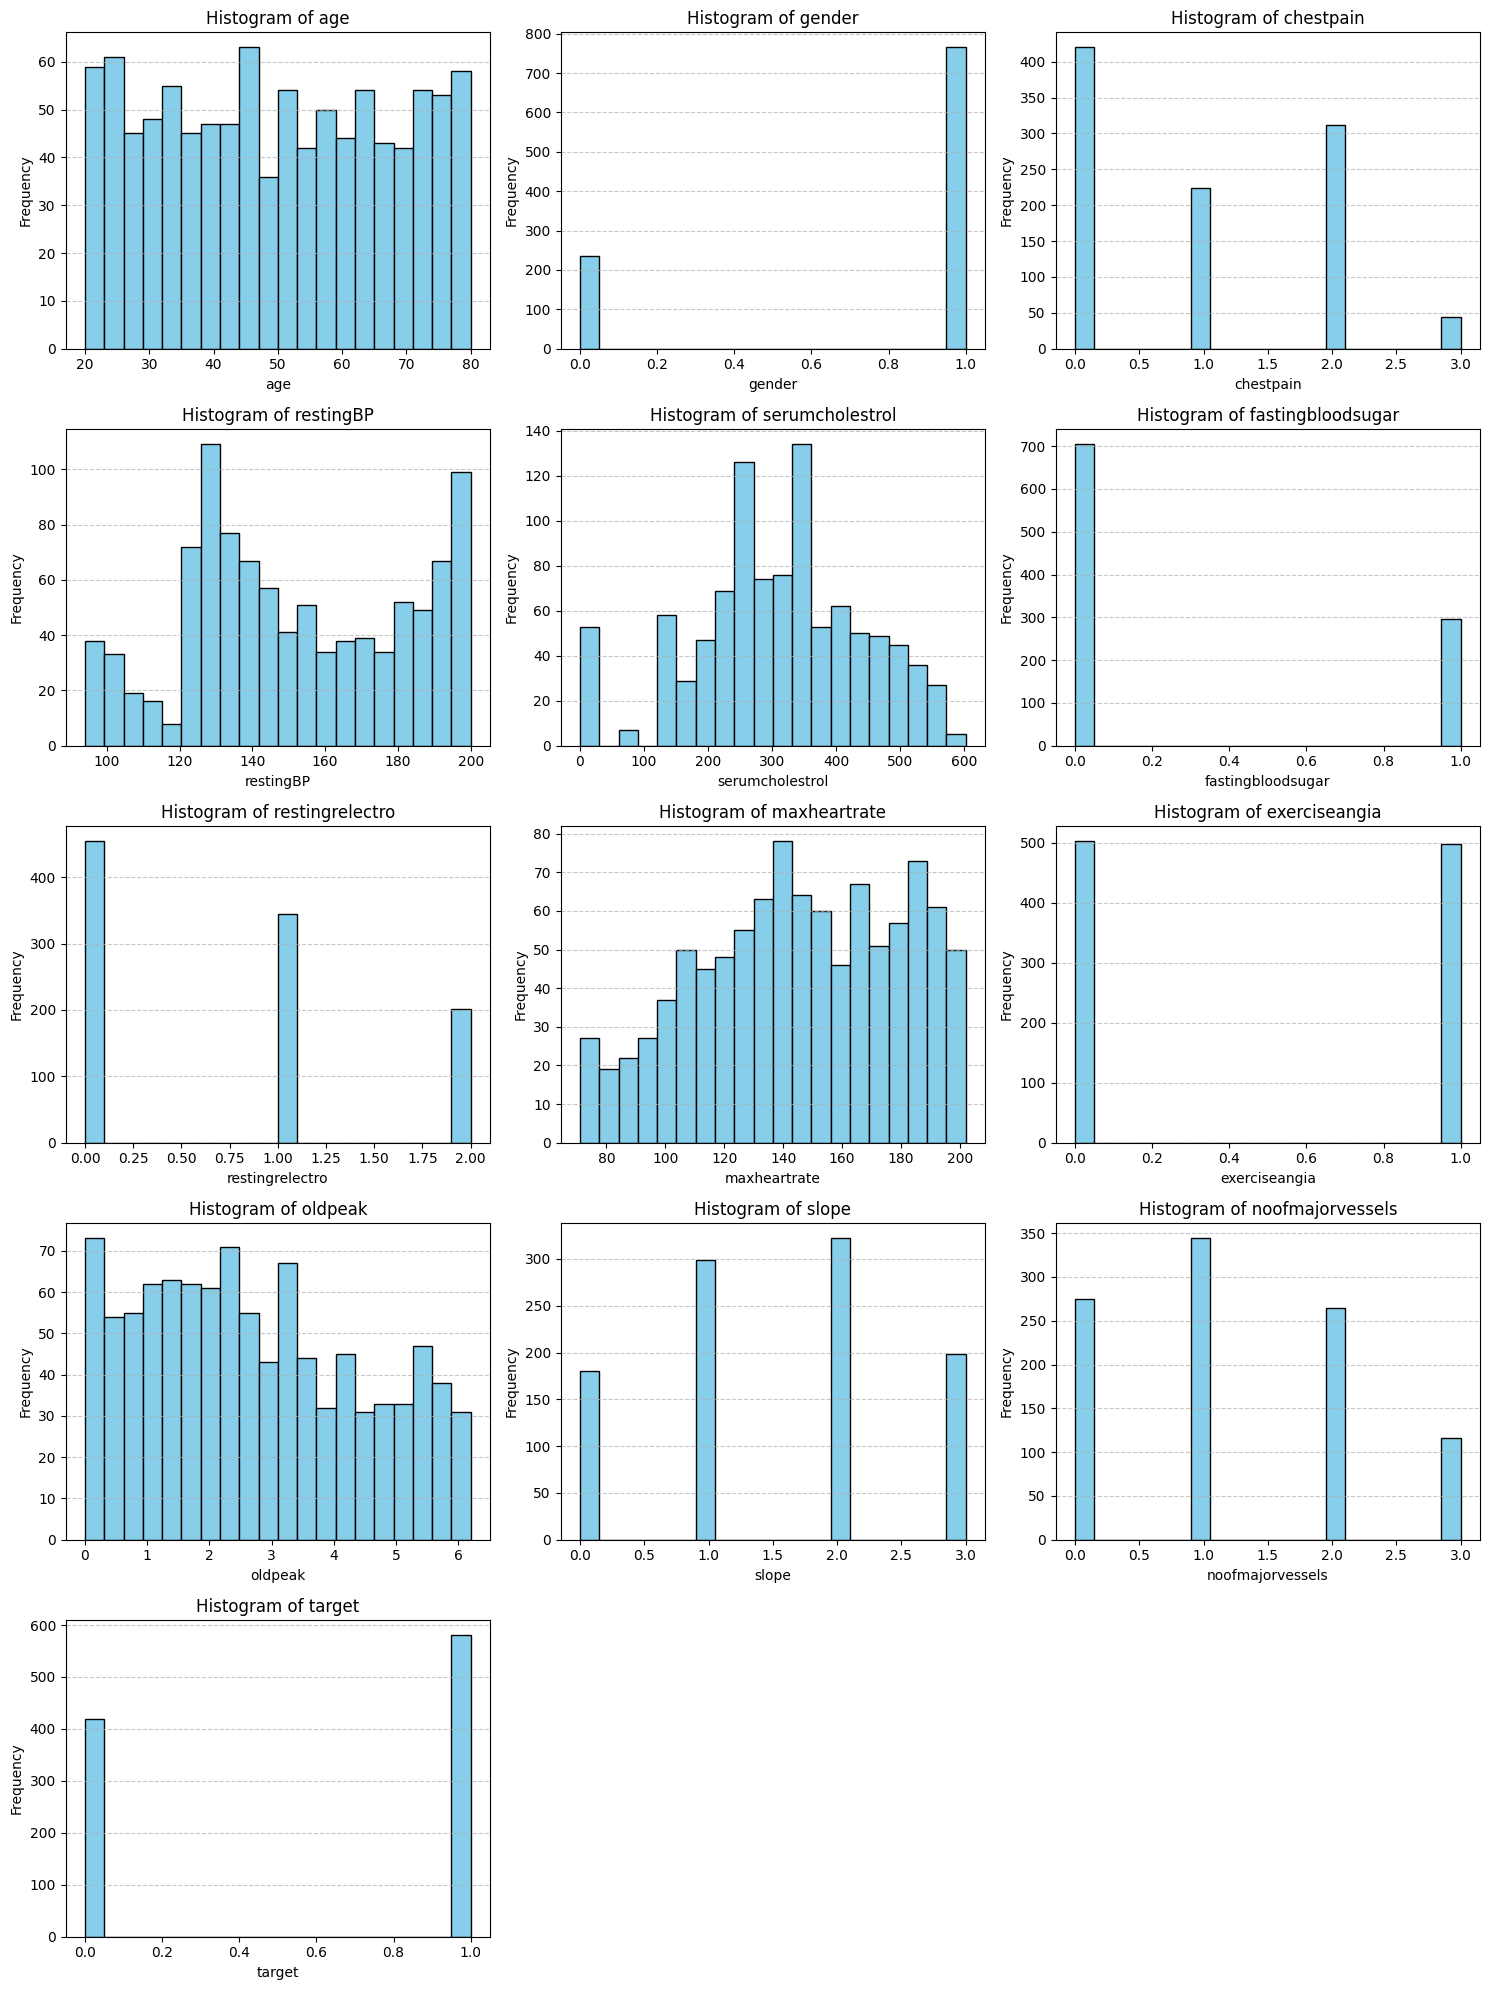

In [28]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Determine subplot grid size
num_cols = len(numeric_columns)
rows = (num_cols // 3) + int(num_cols % 3 != 0)

# Plot histograms
plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, 3, i)
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.title(f'Histogram of {col}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [29]:
X = df.drop(columns=['target'])
y = df['target']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [32]:
lr = LogisticRegression(max_iter=1000, l1_ratio=0)

In [33]:
lr.fit(X_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [34]:
joblib.dump(scaler, "./models/scaler.pkl")
joblib.dump(lr, "./models/logistic_model.pkl")

print("Model and scaler saved!")

Model and scaler saved!


In [35]:
# X_test = X_test.drop(columns=['target'])
X_test_scaled = scaler.transform(X_test)

y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]

In [36]:
def get_scores(y_test, y_pred, y_prob):
    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "auc": roc_auc_score(y_test, y_prob),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "mcc": matthews_corrcoef(y_test, y_pred),
        # "classification_report": classification_report(y_test, y_pred, output_dict=True)
    }

In [37]:
scores = get_scores(y_test, y_pred, y_prob)

In [38]:
scores

{'accuracy': 0.965,
 'auc': 0.9962928637627433,
 'precision': 0.9661016949152542,
 'recall': 0.9743589743589743,
 'f1': 0.9702127659574468,
 'mcc': 0.9278397541433306}

In [39]:
# cm = confusion_matrix(y_test, y_pred)
# plt.subplot(3, 2, 1)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel("Predicted", fontsize=10)
# plt.ylabel("Actual", fontsize=10)
# plt.title(f"LR - Confusion Matrix", fontsize=12)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model = DecisionTreeClassifier(
    criterion="gini",      
    max_depth=5,           
    random_state=42
)

In [42]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [43]:
scores = get_scores(y_test, y_pred, y_prob)

In [44]:
scores

{'accuracy': 0.96,
 'auc': 0.9825455668829163,
 'precision': 0.9658119658119658,
 'recall': 0.9658119658119658,
 'f1': 0.9658119658119658,
 'mcc': 0.9176191947276284}

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

scores = get_scores(y_test, y_pred_knn, y_prob_knn)

scores

{'accuracy': 0.935,
 'auc': 0.9816702708268973,
 'precision': 0.956140350877193,
 'recall': 0.9316239316239316,
 'f1': 0.9437229437229437,
 'mcc': 0.8672401834716498}

In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_scaled, y_train) 

y_pred_nb = nb.predict(X_test_scaled)
y_prob_nb = nb.predict_proba(X_test_scaled)[:, 1]

scores = get_scores(y_test, y_pred_nb, y_prob_nb)

scores

{'accuracy': 0.975,
 'auc': 0.9973226238286479,
 'precision': 0.9745762711864406,
 'recall': 0.9829059829059829,
 'f1': 0.9787234042553191,
 'mcc': 0.948472170290614}

In [ ]:
# !pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
    --------------------------------------- 1.0/72.0 MB 3.1 MB/s eta 0:00:23
   - -------------------------------------- 1.8/72.0 MB 3.5 MB/s eta 0:00:21
   - -------------------------------------- 2.9/72.0 MB 4.1 MB/s eta 0:00:17
   -- ------------------------------------- 3.9/72.0 MB 4.3 MB/s eta 0:00:16
   -- ------------------------------------- 4.5/72.0 MB 4.1 MB/s eta 0:00:17
   --- ------------------------------------ 6.0/72.0 MB 4.5 MB/s eta 0:00:15
   ---- ----------------------------------- 7.6/72.0 MB 4.9 MB/s eta 0:00:14
   ----- ---------------------------------- 9.7/72.0 MB 5.5 MB/s eta 0:00:12
   ------ --------------------------------- 11.5/72.0 MB 6.0 MB/s eta 0:00:11
   ------- -------------------------------- 13.6/72.0 MB 6.3 MB/s eta 0:00:10
   --------- ------------------------------ 16.3/72.0 MB 6.9 MB/s eta 0:00:09
   -------


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=6,           # control overfitting
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

scores = get_scores(y_test, y_pred_rf, y_prob_rf)

scores

{'accuracy': 0.975,
 'auc': 0.9980434558747812,
 'precision': 0.9827586206896551,
 'recall': 0.9743589743589743,
 'f1': 0.9785407725321889,
 'mcc': 0.9486520971768231}

In [49]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

scores = get_scores(y_test, y_pred_xgb, y_prob_xgb)

scores

{'accuracy': 0.98,
 'auc': 0.998661311914324,
 'precision': 0.9829059829059829,
 'recall': 0.9829059829059829,
 'f1': 0.9829059829059829,
 'mcc': 0.9588095973638142}